<h1> Engineering Numerical Methods, AGH UST</h1>
<h3> Author: Tymoteusz Ciesielski </h3>
<h2> Lab 8 - Advection-diffusion equation. Mass transport simulation with Crank-Nicolson method </h2>

<h3> This is the task for university purposes </h3>

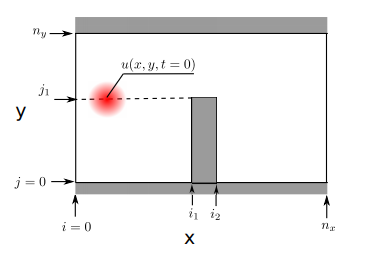

<h2> Picture 1: Base image describing our problem </h2>

In [192]:
import numpy as np
import sys
from math import sqrt, pi, exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


np.set_printoptions(threshold=sys.maxsize)

<h2> Part 1 Velocity Maps </h2>

In [187]:
#initialisation of parameters
n_x = 400
n_y = 90
i_1 = 200
i_2 = 210
j_1 = 50
delta = 0.01
sigma = 10 * delta
x_a = 0.45
y_a = 0.45

board = np.zeros((n_x,n_y))
for _x in range(i_1, i_2 +1):
    for _y in range(0, j_1+1):
        board[_x][_y] = np.Inf

#velocities
v_x = np.zeros((n_x+1, n_y+1))
v_y = np.zeros((n_x+1, n_y+1))

u_0 = np.zeros((n_x+1, n_y+1))
u_1 = np.zeros((n_x+1, n_y+1))

In [167]:
#saving the input data  - flux function
data = open("psi.dat","r").read().splitlines()

flux = np.zeros((n_x + 1, n_y + 1))

# i_values = np.zeros(len(data))
# j_values = np.zeros(len(data))
# psi_values = np.zeros(len(data))

for line in range(0, len(data)):
    i_value = int(data[line][:6])
    j_value = int(data[line][6:14])
    psi_value = float(data[line][14:])
    flux[i_value][j_value] = psi_value

In [ ]:
print(flux)

In [189]:
#counting the velocity vectors
#bounding conditions - x velocity and y velocity on the top and bottom of the pipe are equal 0

#bounding conditions
#upper and lower side
v_x[:][0] = v_x[:][n_y] = v_y[:][0] = v_y[:][n_y] = 0
#left and right side
v_x[0][:] = flux[1][:]
v_x[n_x][:] = flux[n_x-1][:]

#calculating the velocity field Values
for _x in range(1, n_x-1):
    for _y in range(1, n_y-1):
        v_x[_x][_y] = (flux[_x][_y+1] - flux[_x][_y-1]) / (2*delta)
        v_y[_x][_y] = -(flux[_x+1][_y] - flux[_x-1][_y]) / (2*delta)

#calculating v_max and d_t
v_max = 0
for _x in range(n_x):
    for _y in range(n_y):
        if sqrt(v_x[_x][_y]**2 + v_y[_x][_y]**2) > v_max:
            v_max =  sqrt(v_x[_x][_y]**2 + v_y[_x][_y]**2)

d_t = delta / (4*v_max)

In [186]:
print(d_t)

5.6973564266180484e-05


<h2> Plotting velocity maps</h2>

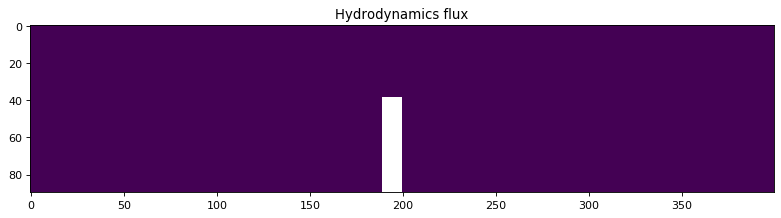

In [174]:
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
#plt.gca().invert_yaxis()


plt.title("Hydrodynamics flux")
plt.xlabel=('x axis')
plt.ylabel=('y axis')

#plt.imshow(np.transpose(board))
#plt.imshow(board)
plt.imshow(np.flip(board.transpose(1,0)) )

plt.show()

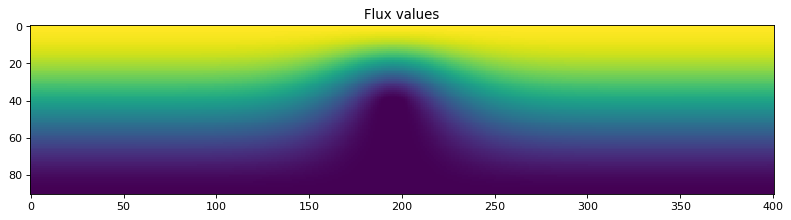

In [175]:
# flux 
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')


plt.title("Flux values")
plt.xlabel=('x axis')
plt.ylabel=('y axis')

plt.imshow(np.flip(flux.transpose(1,0)) )

plt.show()

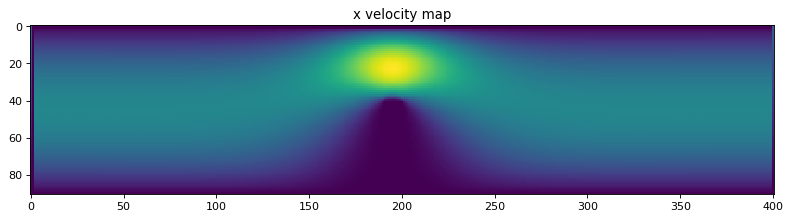

In [190]:
# x velocity
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')


plt.title("x velocity map")
plt.xlabel=('x axis')
plt.ylabel=('y axis')

plt.imshow(np.flip(v_x.transpose(1,0)) )

plt.show()

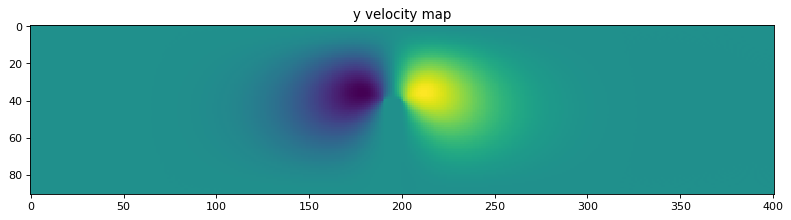

In [177]:
# y velocity
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')


plt.title("y velocity map")
plt.xlabel=('x axis')
plt.ylabel=('y axis')

#plt.imshow(np.transpose(board))
#plt.imshow(board)
plt.imshow(np.flip(v_y.transpose(1,0)) )

plt.show()

<h2> Part 2 Advection-diffusion algorithm for D = 0</h2>

Advection-diffusion algorithm, for D=0 (no diffusion)

In [198]:
#parameters were already initialised, v_max and d_t calculated
#we initialise density (17)

for _x in range(n_x):
    for _y in range(n_y):
        print( exp( -( (_x*delta - x_a)**2 + (_y*delta - y_a)**2 ) / (2*sigma**2)) )
        u_0[_x][_y] = 1/(2*pi*sigma**2) * exp( -( (_x*delta - x_a)**2 + (_y*delta - y_a)**2 ) / (2*sigma**2)  )
        #print(u_0)

iterations = 2

for it in range(iterations):
    u_1 = np.copy(u2)
    for k in range(1, 21):
        for i in range(n_x):  #or maybe n_x + 1 (?)
            for j in range(1, n_y-1): #or mayber n_y (?)
                if (i in range(i_1, i_2+1) ) and (j in range(j_1)):
                    continue
                elif (i==0 || i==n_x):
                    #formula (9) + bounding conditions
                    pass
                else:
                    #formula (9)
                    pass
                

1.6052280551856172e-09
2.5049426421926953e-09
3.870043846979683e-09
5.9195819920173135e-09
8.964441765838563e-09
1.3440409951135022e-08
1.9950732050961024e-08
2.931988154532722e-08
4.2660175926073594e-08
6.145258101161914e-08
8.764248219443668e-08
1.2375030139319652e-07
1.72995544001002e-07
2.394311345154981e-07
3.280827414028583e-07
4.450852500419427e-07
5.978057311938054e-07
7.949393615349141e-07
1.046562054120397e-06
1.3641213994147662e-06
1.7603463121561725e-06
2.2490559670323505e-06
2.844850614070252e-06
3.56267104817255e-06
4.417220084053285e-06
5.422248370634163e-06
6.589718016307741e-06
7.928870232463175e-06
9.445236666432113e-06
1.1139647128990519e-05
1.300729765406762e-05
1.5036950790356599e-05
1.7210343304043694e-05
1.9501873891726126e-05
2.1878634302005227e-05
2.4300831259329505e-05
2.6722624281246915e-05
2.909337712196247e-05
3.135929009547297e-05
3.3465349423665796e-05
3.535750085041004e-05
3.6984930946275055e-05
3.8302323416555486e-05
3.927195135021125e-05
3.986547088855

0.0030275547453758205
0.0023227580145299674
0.0017643022368343403
0.0013267804310269926
0.0009878299405312312
0.000728152539089461
0.0005313976217982539
0.00038394931740958307
0.00027465356997214254
0.0001945152484068638
0.00013638892648201164
9.468073598065517e-05
6.507305474754294e-05
4.42790015027418e-05
2.9829879470267725e-05
1.989583787737186e-05
1.3138023168804552e-05
8.5892425841003e-06
5.559513241650156e-06
4.417220084053285e-06
6.893028634000302e-06
1.0649474603824276e-05
1.6289334328458052e-05
2.4668091292367405e-05
3.698493094627499e-05
5.4899846798952354e-05
8.068160110066513e-05
0.00011739103691911839
0.0001691034331131517
0.00024117204487855926
0.0003405324962741613
0.00047604412902226977
0.0006588596634060363
0.0009028085883961136
0.001224772703946922
0.0016450245020705747
0.002187491118182885
0.002879899158088243
0.0037537497697702604
0.004844070012248972
0.006188887090305937
0.007828377549225773
0.009803655035821836
0.012155178329914935
0.014920786069067856
0.018133395

6.220967647383872e-05
9.611165206139503e-05
0.00014701146221112946
0.00022262985691888938
0.00033378950106577093
0.0004954718584774102
0.0007281525390894623
0.0010594556929076119
0.0015261607666468505
0.0021765809607151294
0.0030733103758703055
0.004296304690752343
0.005946217356472099
0.008147859697679989
0.011053590186859395
0.014846368338086818
0.01974213687149278
0.025991128778755347
0.03387764234567433
0.04371779725275096
0.05585478953648462
0.0706512130604296
0.08847811904208731
0.10970064851551141
0.1346602956955058
0.1636541368027041
0.1969116752041941
0.23457028809379776
0.2766505836319733
0.3230332564222529
0.373439226936661
0.4274149319487267
0.4843245689553626
0.5433508690744999
0.6035055754270408
0.6636502501363193
0.7225273536420721
0.7788007830714049
0.8311042838521256
0.8780954309205614
0.9185122844014575
0.9512294245007139
0.9753099120283326
0.990049833749168
0.9950124791926823
0.990049833749168
0.9753099120283326
0.9512294245007141
0.9185122844014575
0.878095430920561

0.03579310506765533
0.03065375842920566
0.025991128778755347
0.021818435531042773
0.018133395236801075
0.014920786069067856
0.012155178329914935
0.009803655035821828
0.007828377549225767
0.006188887090305937
0.004844070012248967
0.003753749769770267
0.0028798991580882456
0.0021874911181828873
0.001645024502070576
0.0012247727039469242
0.0009028085883961136
0.0006588596634060363
0.00047604412902226977
0.0003405324962741613
0.00024117204487855885
0.0001691034331131517
0.00011739103691911796
8.068160110066498e-05
5.489984679895255e-05
3.698493094627512e-05
2.4668091292367493e-05
1.628933432845808e-05
1.0649474603824276e-05
6.893028634000302e-06
3.56267104817255e-06
5.559513241650156e-06
8.5892425841003e-06
1.3138023168804505e-05
1.989583787737179e-05
2.982987947026762e-05
4.4279001502741644e-05
6.507305474754305e-05
9.468073598065533e-05
0.00013638892648201164
0.00019451524840686412
0.00027465356997214254
0.0003839493174095827
0.0005313976217982534
0.000728152539089461
0.00098782994053122

1.6413360223486448e-06
1.2098671473041655e-06
8.82947583446221e-07
6.379537808720612e-07
4.56352636790401e-07
3.2319822573366013e-07
2.266180127765718e-07
1.5731746549811914e-07
1.0812260740342576e-07
7.357209699576032e-08
4.956405319172533e-08
3.305807413103683e-08
2.1829577951254933e-08
1.4271518486667181e-08
9.237449661970627e-09
3.870043846979683e-09
6.039165480654335e-09
9.330287574505038e-09
1.427151848666713e-08
2.161237002145442e-08
3.240348040531845e-08
4.8099214044470475e-08
7.06872938098167e-08
1.0284940561587761e-07
1.4815600951949224e-07
2.1129723459224347e-07
2.983495652978995e-07
4.170749062435008e-07
5.772444519105543e-07
7.909745849287065e-07
1.073055898656749e-06
1.4412496618296723e-06
1.9165190733440168e-06
2.523156149026264e-06
3.28875988136649e-06
4.244018407169938e-06
5.422248370634172e-06
6.8586495102627955e-06
8.5892425841003e-06
1.0649474603824276e-05
1.3072497004883107e-05
1.5887149230888543e-05
1.911571091566564e-05
2.2771518306142223e-05
2.6856571992874623e-

5.237534801691001e-10
5.589282529150831e-10
5.905303998944019e-10
6.177112504125811e-10
6.397139452745262e-10
6.559083809003101e-10
6.658211666428484e-10
6.691586091292758e-10
6.658211666428484e-10
6.559083809003101e-10
6.397139452745262e-10
6.177112504125811e-10
5.905303998944019e-10
5.589282529150831e-10
5.237534801691001e-10
4.859088796687938e-10
4.463132750755363e-10
4.0586521264756787e-10
3.6541040381129455e-10
3.257144625887111e-10
2.8744200436154466e-10
2.5114265289818257e-10
2.172439935079017e-10
1.8605105325731774e-10
1.5775151669580538e-10
1.3242561822728503e-10
1.1005949860046248e-10
9.056076989672835e-11
7.377508816852123e-11
5.95026658606486e-11
4.751384374914772e-11
3.756305982189059e-11
2.940077739284452e-11
2.2783147454596494e-11
1.7479366286343755e-11
1.327683936274503e-11
9.98437245309293e-12
7.433680672352162e-12
5.479539781354051e-12
3.998907168546896e-12
2.8893198139504922e-12
2.0668405065718853e-12
1.4637785141259037e-12
1.026362620844391e-12
7.124974939765171e-13

1.947802589282278e-20
1.3794734382669927e-20
9.672501405244314e-21
6.714618081133181e-21
4.614885018338813e-21
3.140201446739694e-21
2.1154910338889564e-21
1.4109834631829511e-21
9.31729216148313e-22
6.0913640944048535e-22
3.9427247526160427e-22
1.0323853988769519e-22
1.6110272932682694e-22
2.488977655061846e-22
3.8071163759388106e-22
5.765385646131278e-22
8.644057113036033e-22
1.2831101724008205e-21
1.8856770853470575e-21
2.7436439699222422e-21
3.952257572047127e-21
5.6366332899911276e-21
7.95886938633056e-21
1.1126024935862252e-20
1.5398759479179426e-20
2.110029355353302e-20
2.862518580549373e-20
3.844724157765096e-20
5.1125681935973213e-20
6.730852854223458e-20
8.773202103601104e-20
1.1321480606858478e-19
1.446456492035825e-19
1.8296355003667322e-19
2.291294099460314e-19
2.8408882486640187e-19
3.487261531994422e-19
4.238107252595832e-19
5.099368797562241e-19
6.074603787207112e-19
7.164345905530215e-19
8.365505532703271e-19
9.670855421101077e-19
1.1068649765593481e-18
1.2542423359420

2.148559270641212e-27
2.611167686734647e-27
3.1418051109446893e-27
3.7426634517462474e-27
4.4140715206421094e-27
5.1541257519652074e-27
5.958373319409178e-27
6.819577438961282e-27
7.727593625528407e-27
8.669382024830509e-27
9.629174600206312e-27
1.058880711667221e-26
1.1528215023898508e-26
1.242608026225033e-26
1.326060368958261e-26
1.4010366373159834e-26
1.4655233553853354e-26
1.5177248705432242e-26
1.556146258563936e-26
1.579664397521123e-26
1.587582498264555e-26
1.579664397521123e-26
1.556146258563936e-26
1.5177248705432242e-26
1.4655233553853354e-26
1.4010366373159834e-26
1.326060368958261e-26
1.242608026225033e-26
1.1528215023898508e-26
1.058880711667221e-26
9.629174600206312e-27
8.669382024830509e-27
7.727593625528407e-27
6.819577438961282e-27
5.958373319409178e-27
5.1541257519652074e-27
4.4140715206421094e-27
3.7426634517462474e-27
3.1418051109446893e-27
2.611167686734647e-27
2.148559270641212e-27
1.7503180439787322e-27
1.4117040359589737e-27
1.1272685688013178e-27
8.91185670197

3.671051946034112e-35
4.7849628201522573e-35
6.174810876710256e-35
7.889069981094298e-35
9.978953796233742e-35
1.2496870522852485e-34
1.5494393592603196e-34
1.901975650132525e-34
2.31149190364199e-34
2.781229682667919e-34
3.3131293370081854e-34
3.907481941468255e-34
4.562602396829923e-34
5.274548914135089e-34
6.036915253087923e-34
6.840721180332108e-34
7.674423386050311e-34
8.524063483248072e-34
9.373561891010785e-34
1.0205156806497239e-33
1.0999976779015827e-33
1.1738724487743108e-33
1.2402439185786466e-33
1.2973296919156248e-33
1.343540197758779e-33
1.3775520797944457e-33
1.3983711133878979e-33
1.4053804777629322e-33
1.3983711133878979e-33
1.3775520797944457e-33
1.343540197758779e-33
1.2973296919156248e-33
1.2402439185786466e-33
1.1738724487743108e-33
1.0999976779015827e-33
1.0205156806497239e-33
9.373561891010785e-34
8.524063483248072e-34
7.674423386050311e-34
6.840721180332108e-34
6.036915253087923e-34
5.274548914135089e-34
4.562602396829923e-34
3.907481941468255e-34
3.313129337008

6.628172894746798e-45
4.7890362211235035e-45
3.425780005891603e-45
2.4262071266754762e-45
1.7011920049481897e-45
1.1809617923354333e-45
8.116623785339253e-46
5.522961818567276e-46
3.720709134702468e-46
2.481626712795808e-46
1.6387180801325807e-46
1.071344367136676e-46
6.9344335512065665e-47
1.101308888112081e-47
1.7185817224822907e-47
2.655145275024106e-47
4.06128477549129e-47
6.150290833622122e-47
9.221146422925876e-47
1.3687723972358245e-46
2.0115675177710763e-46
2.926813468281804e-46
4.216115800299652e-46
6.012942790597867e-46
8.490214607862503e-46
1.186881387953665e-45
1.6426802140720696e-45
2.2508978582570806e-45
3.0536243137246927e-45
4.1014033052889346e-45
5.4538903773851884e-45
7.180213979192786e-45
9.358913313196744e-45
1.2077318443756855e-44
1.54302394501063e-44
1.9517845184087364e-44
2.4442640895148797e-44
3.030549910711953e-44
3.720075976020836e-44
4.521049204234599e-44
5.439809771259725e-44
6.480152809104158e-44
7.642647631255672e-44
8.923998350556922e-44
1.031649521825031

1.4007529713036936e-53
1.3661682572156232e-53
1.3191794686865704e-53
1.261132250150286e-53
1.1936429443723952e-53
1.118523966061378e-53
1.0377033238158198e-53
9.531432504890463e-54
8.667626746658381e-54
7.803676912640902e-54
6.955933397915523e-54
6.138589678245188e-54
5.363383477206802e-54
4.639446274285707e-54
3.973292204418079e-54
3.368929444627665e-54
2.8280714747688076e-54
2.3504223177203828e-54
1.9340089440886712e-54
1.575535196217512e-54
1.270734426207335e-54
1.0147020490624392e-54
8.021938610473233e-55
6.278807755915037e-55
4.865551717584507e-55
3.732880227646076e-55
2.835391760257698e-55
2.1322550202934916e-55
1.5875312151412653e-55
1.1702063662569793e-55
8.540035866931664e-56
6.17040951494241e-56
4.413928934430495e-56
3.1260343101241636e-56
2.1918922408179164e-56
1.5216042526612118e-56
1.0457822894168005e-56
7.116032241651586e-57
4.793928879851999e-57
3.197439395766021e-57
2.111398028137322e-57
1.3803682351789045e-57
8.934635861881658e-58
1.1971400177819442e-58
1.8681252607876

3.728315449714152e-70
3.1297605799049026e-70
2.601157425390472e-70
2.1403224806709956e-70
1.743607965133676e-70
1.4062920793035687e-70
1.122947033636754e-70
8.8776919047029e-71
6.948609742923825e-71
5.3845923276848025e-71
4.13109127199418e-71
3.1378617687047367e-71
2.3597167781497995e-71
1.7568836788058333e-71
1.2950400257349238e-71
9.451058025144624e-72
6.828647944025298e-72
4.884791952654361e-72
3.45950908332554e-72
2.425715895766726e-72
1.683923850822722e-72
1.1573428089708654e-72
7.87514650671037e-73
5.305329007731171e-73
3.5385314221315873e-73
2.3366348325737268e-73
1.527621252418668e-73
9.887752613680972e-74
1.0632145161201687e-74
1.6591358284724847e-74
2.5633035647726918e-74
3.9208045753652295e-74
5.937551728904567e-74
8.902186151363006e-74
1.3214264387718477e-73
1.9419872191500593e-73
2.8255747311616115e-73
4.0702799813107966e-73
5.804954566854583e-73
8.196537332527404e-73
1.1458270556123458e-72
1.5858597599614494e-72
2.1730391019591986e-72
2.9479991782279766e-72
3.959535401663

8.520612121236524e-88
1.2774975055383928e-87
1.8962971011621124e-87
2.7868253775751414e-87
4.054806998411958e-87
5.841006281553959e-87
8.330330160288775e-87
1.176234221383121e-86
1.644305320552135e-86
2.2757689549933973e-86
3.1183936001665696e-86
4.2304907272005914e-86
5.682083605880918e-86
7.555819019712175e-86
9.947467513199054e-86
1.296583728725249e-85
1.6731915401682403e-85
2.1377051727930638e-85
2.704002018031568e-85
3.386283151809556e-85
4.198523452266945e-85
5.153792773493324e-85
6.263460979717775e-85
7.536311749816726e-85
8.977602859180281e-85
1.0588123034641146e-84
1.2363306154559304e-84
1.4292471134008464e-84
1.6358258952151886e-84
1.8536335826497472e-84
2.0795422793661375e-84
2.3097696743752335e-84
2.539958675728386e-84
2.7652963589741795e-84
2.9806691178372976e-84
3.180847947803335e-84
3.360695045961443e-84
3.5153806467329317e-84
3.640597481689274e-84
3.7327596457191913e-84
3.789173083439842e-84
3.8081663925605564e-84
3.789173083439842e-84
3.7327596457191913e-84
3.640597481

4.872852455256253e-102
4.848549002244696e-102
4.776363511861696e-102
4.6584346765692746e-102
4.498209754977372e-102
4.300277198515262e-102
4.070148500477915e-102
3.814003730912082e-102
3.5384171181864226e-102
3.2500795903906992e-102
2.955534414368901e-102
2.6609401106039105e-102
2.3718719255560708e-102
2.093169627630652e-102
1.8288356095229835e-102
1.581983572672135e-102
1.3548347421661662e-102
1.1487558479622762e-102
9.643311617216058e-103
8.014597595589218e-103
6.594688672023287e-103
5.372345429232458e-103
4.3330192196233346e-103
3.459986123065253e-103
2.7353641690153724e-103
2.1409819488325186e-103
1.659082233987193e-103
1.2728577614142267e-103
9.668272724007516e-104
7.270678903100963e-104
5.413250105680724e-104
3.990233184325297e-104
2.9120277836597165e-104
2.1040197282598075e-104
1.5050854460614774e-104
1.0659321466089022e-104
7.474033134644551e-105
5.1884487706212424e-105
3.56596521360418e-105
2.4264632982804147e-105
1.6346598900214697e-105
1.090280240284783e-105
7.19955959916755

2.0651671331450347e-120
1.699291091829934e-120
1.3843229277611003e-120
1.1165138078269595e-120
8.915543840185971e-121
7.048369068637967e-121
5.516790457226521e-121
4.275051941099106e-121
3.2798452856671103e-121
2.491279047483485e-121
1.8734773551948545e-121
1.3948630693446362e-121
1.0281861724895743e-121
7.503588293601784e-122
5.42154779259579e-122
3.8782396230244975e-122
2.746648236651318e-122
1.9258768013755236e-122
1.3369372255184707e-122
9.188626215153932e-123
6.252406553947701e-123
4.212121492663202e-123
2.8093873601250158e-123
1.8551516379939457e-123
1.2128420877545725e-123
7.8502983014869e-124
4.821748512721791e-125
7.524291280872619e-125
1.1624752073737873e-124
1.7781109402951646e-124
2.6927191816874778e-124
4.037200601054737e-124
5.992756747782295e-124
8.807041141453837e-124
1.2814169249004617e-123
1.845899030598625e-123
2.6325854871967447e-123
3.717184170585067e-123
5.1964018713704385e-123
7.191979438808332e-123
9.85487679023837e-123
1.3369372255183189e-122
1.7956756275025817

3.4538795695337115e-141
2.6498369562463465e-141
2.012742283055957e-141
1.5136108871294653e-141
1.1269311166001662e-141
8.306872673752338e-142
6.062263257274122e-142
4.38015102835989e-142
3.133288854562225e-142
2.2190589400947168e-142
1.5559451977090377e-142
1.0801319451992789e-142
7.423631056151022e-143
5.051414475106144e-143
3.4030371018516734e-143
2.2697468334261566e-143
1.4988052611138436e-143
9.79873593509871e-144
6.342375552817226e-144
3.221472277630333e-145
5.027075905388831e-145
7.766646568370115e-145
1.1879788183890518e-144
1.7990403631302272e-144
2.697305714144263e-144
4.0038379601563177e-144
5.884097606975369e-144
8.561311500925151e-144
1.233268914521109e-143
1.758864267416758e-143
2.4834986156561723e-143
3.4717830114697817e-143
4.805054084069466e-143
6.5841700983481135e-143
8.932249779465062e-143
1.1997140121168716e-142
1.5953341379183214e-142
2.1003063292330345e-142
2.737604328145661e-142
3.532773318607472e-142
4.5135464865744844e-142
5.7092245289513544e-142
7.1497915694457

1.1900023132434616e-164
1.614386891781244e-164
2.168325587469033e-164
2.8833570308204155e-164
3.796027977670433e-164
4.947860451017174e-164
6.385024017472099e-164
8.15764277004748e-164
1.0318673872023676e-163
1.2922309690911007e-163
1.6021879406555442e-163
1.9667258559363857e-163
2.3901835401328927e-163
2.875912910777598e-163
3.425920374270487e-163
4.0405069146678474e-163
4.7179300658120894e-163
5.454113845836198e-163
6.242433922599286e-163
7.073604342765262e-163
7.935688820041477e-163
8.814253772901375e-163
9.692672212699924e-163
1.0552577659879522e-162
1.137445621056324e-162
1.2138353592566054e-162
1.282466356583759e-162
1.3414955383822603e-162
1.389279218815465e-162
1.4244489896818305e-162
1.4459767793046677e-162
1.4532247680731354e-162
1.4459767793046677e-162
1.4244489896818305e-162
1.389279218815465e-162
1.3414955383822603e-162
1.282466356583759e-162
1.2138353592566054e-162
1.137445621056324e-162
1.0552577659879522e-162
9.692672212699924e-163
8.814253772901375e-163
7.9356888200414

9.960054822762863e-189
7.565379989163248e-189
5.689273591193559e-189
4.235843898379149e-189
3.1223395477694037e-189
2.278648663652394e-189
1.6463859888287336e-189
1.1777226026464375e-189
8.340871179332546e-190
5.848397364171973e-190
4.059937863211746e-190
2.79035176594312e-190
1.898696634370392e-190
1.2791140231644348e-190
8.531393918945421e-191
5.633623055241409e-191
3.683092534327478e-191
2.3839356630492e-191
8.116694157785585e-193
1.2666021655796603e-192
1.956853556208346e-192
2.9931844522607033e-192
4.5327909559975416e-192
6.796024812562017e-192
1.0087911792873142e-191
1.4825339644242088e-191
2.1570741901169873e-191
3.1072955874808526e-191
4.4315648539992266e-191
6.257324902200205e-191
8.747367184244208e-191
1.210662425464089e-190
1.6589214609178507e-190
2.250534331904784e-190
3.0227519823097735e-190
4.019540806504321e-190
5.291848770644958e-190
6.897559606793617e-190
8.901035950250224e-190
1.1372153239642001e-189
1.4384736352199162e-189
1.8014332100288266e-189
2.2335283970440745e-

6.161868667855882e-216
9.331353618587166e-216
1.399052180926191e-215
2.0767309396402265e-215
3.051993530675521e-215
4.4406243846026697e-215
6.396781630949564e-215
9.122966211723051e-215
1.2881536328421218e-214
1.8007619857211015e-214
2.49230977435527e-214
3.4151106740994323e-214
4.633024528516762e-214
6.222737364691022e-214
8.274759858538074e-214
1.0893975180929007e-213
1.4199544700183435e-213
1.8323967469455685e-213
2.3411091381449702e-213
2.9612894774004844e-213
3.708490081768224e-213
4.598015547661122e-213
5.6441793338446507e-213
6.859433154139647e-213
8.253396459883654e-213
9.831827307038344e-213
1.1595589470279344e-212
1.3539682358678835e-212
1.565240857549231e-212
1.7914757378347764e-212
2.0300079610342282e-212
2.2774120095438918e-212
2.529545683151955e-212
2.7816373099238144e-212
3.028416012679362e-212
3.264281622352279e-212
3.4835075914245015e-212
3.6804672518706276e-212
3.8498712829381917e-212
3.987002576952582e-212
4.0879340277190195e-212
4.1497152388251487e-212
4.17051577302

1.2678552173721929e-233
1.0537199024624748e-233
8.670372556294881e-234
7.063295735272512e-234
5.696840714724882e-234
4.549019706396993e-234
3.596322374263674e-234
2.814857843317255e-234
2.1812797822016982e-234
1.673490827467014e-234
1.2711369810166583e-234
9.559131289170638e-235
7.117075193521552e-235
5.246162482447219e-235
3.828591012297943e-235
2.7662617322933292e-235
1.9788123739289554e-235
1.4014351989105422e-235
9.826491438537775e-236
6.8215174465139945e-236
4.688355806074638e-236
3.1901946909969886e-236
2.1491704846424193e-236
1.4334468758378389e-236
9.465627123665813e-237
6.188341010757831e-237
4.005494484093279e-237
9.706902453361803e-239
1.5147526110375912e-238
2.340236827503036e-238
3.579603831092307e-238
5.4208473050751536e-238
8.127489916924943e-238
1.2064317544552298e-237
1.7729893841889574e-237
2.5796843322038514e-237
3.7160714171431627e-237
5.299789165057437e-237
7.483248877425184e-237
1.0461135818423736e-236
1.4478532564466038e-236
1.98393440554525e-236
2.69145501888684

2.1703304942083517e-263
4.3931637671890337e-265
6.855488987386134e-265
1.0591477236558716e-264
1.6200622111124076e-264
2.4533748106094047e-264
3.678350987122877e-264
5.460086053943438e-264
8.024220661177181e-264
1.1675172171013457e-263
1.6818249059898944e-263
2.3985861448116e-263
3.3867794579285834e-263
4.7345157800803944e-263
6.552714933511027e-263
8.978918649689912e-263
1.2181025540127609e-262
1.6360656478777323e-262
2.175577974061697e-262
2.864215138418514e-262
3.7333067327079684e-262
4.8176890575059757e-262
6.155182220263625e-262
7.785743963560355e-262
9.750264028020537e-262
1.2088980853700508e-261
1.4839527007779622e-261
1.8034640206864509e-261
2.1699611657966547e-261
2.584958028951183e-261
3.0486817115026743e-261
3.5598174713115984e-261
4.115289859767581e-261
4.710100622772452e-261
5.337243234483092e-261
5.987711414627172e-261
6.65061459997449e-261
7.313407236893093e-261
7.962231274521378e-261
8.582362896484923e-261
9.158746015523404e-261
9.676587144897346e-261
1.012197974239791e

Density integrals

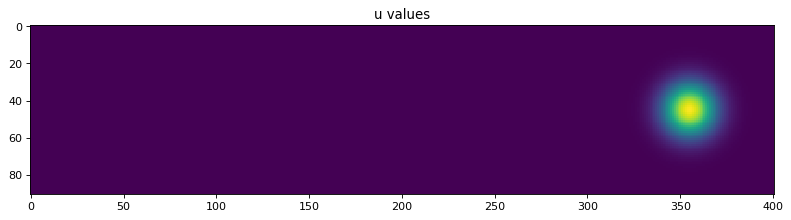

In [199]:
# u values
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')


plt.title("u values")
plt.xlabel=('x axis')
plt.ylabel=('y axis')

#plt.imshow(np.transpose(board))
#plt.imshow(board)
plt.imshow(np.flip(u_0.transpose(1,0)) )

plt.show()

Paquet x (?)

Some 5 distribution-of-something-maps

<h2> Part 3 Advection-diffusion algorithm for D = 0.1</h2>